In [71]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
from sklearn.preprocessing import OneHotEncoder,LabelEncoder


In [72]:
df = sns.load_dataset('penguins')

In [73]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [74]:
le = LabelEncoder()

In [75]:
df['sex'] = le.fit_transform(df['sex'])

In [84]:
df = pd.get_dummies(df, columns=['island'], drop_first=True)


In [85]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [86]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [87]:
x= df.drop(columns='species')

In [88]:
y=df['species']

In [89]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [90]:
dt = DecisionTreeClassifier()

In [91]:
dt.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [92]:
y_pred_test  =  dt.predict(x_test)

In [93]:
y_pred_train = dt.predict(x_train)

In [94]:
print(f"your accuracy on training is {accuracy_score(y_pred_train,y_train)}")
print(f"your accuracy on testing is {accuracy_score(y_pred_test,y_test)}")

your accuracy on training is 0.9963636363636363
your accuracy on testing is 0.9710144927536232


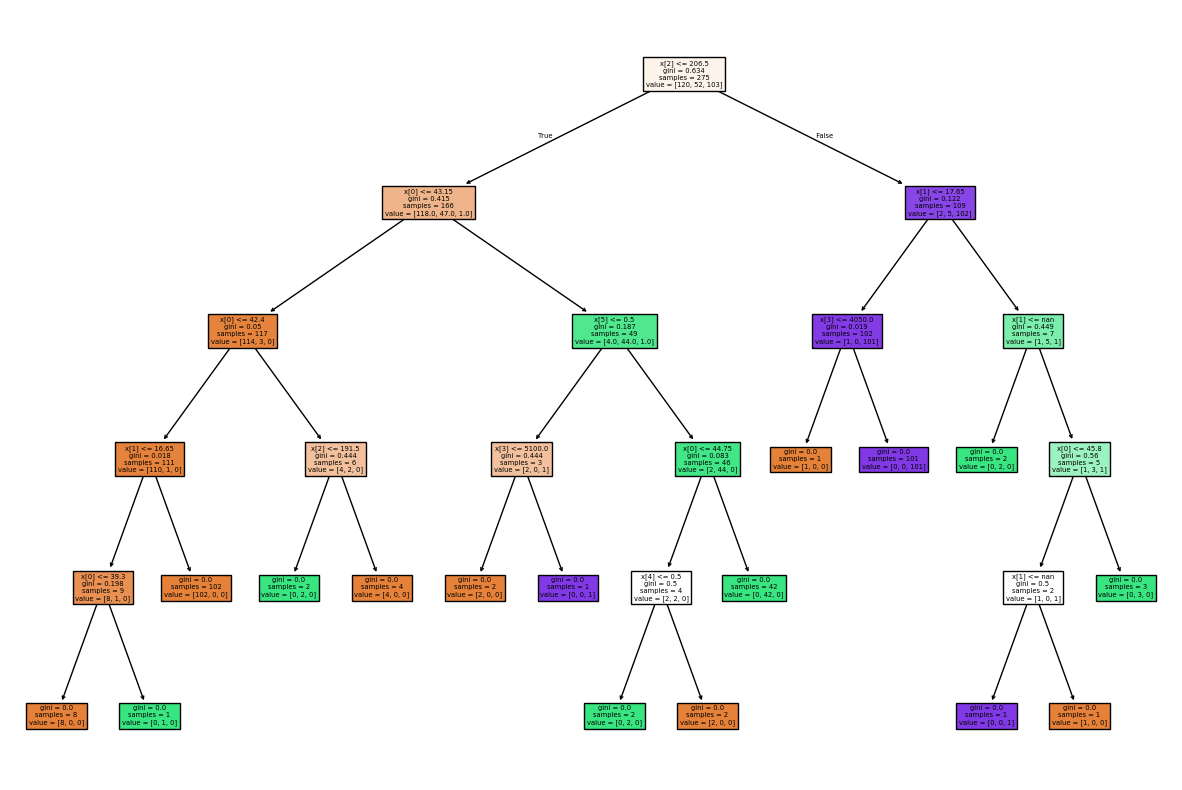

In [95]:
plt.figure(figsize=(15,10))
plot_tree(dt,filled=True)
plt.show()

# Hyper Parameter Tuning

In [96]:
param_grid = {"max_depth":[3,4,5,6,7,8,9,10],
              "min_samples_split":[2,3,4,5,6,7,8],
              "max_leaf_nodes":[1,2,3,4,5,6,7,8],
              "criterion":["gini","entropy"],
              "splitter":["best","random"],
              "random_state":[0,42]}

In [98]:
grid_search = GridSearchCV(dt, param_grid,cv=5,n_jobs=-1)

In [100]:
grid_search.fit(x_train,y_train)

C:\Users\Jyoti\.conda\envs\streamlit_ds\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
2240 fits failed out of a total of 17920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Jyoti\.conda\envs\streamlit_ds\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Jyoti\.conda\envs\streamlit_ds\lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "C:\Users\Jyoti\.conda\envs\streamlit_ds\lib\site-packages\sklearn\base.py", line 471, in _validate_params
    validate_paramet

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, ...], 'max_leaf_nodes': [1, 2, ...], 'min_samples_split': [2, 3, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [102]:
b = grid_search.best_params_
b

{'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 8,
 'min_samples_split': 7,
 'random_state': 0,
 'splitter': 'random'}

In [104]:
grid_search.best_score_

np.float64(0.9781818181818182)

In [103]:
dtree = DecisionTreeClassifier(**b)

In [105]:
dtree.fit(x_train,y_train)

,criterion,'gini'
,splitter,'random'
,max_depth,5
,min_samples_split,7
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,8
,min_impurity_decrease,0.0
,class_weight,None


In [106]:
y_pred_train_t = dtree.predict(x_train)
y_pred_test_t = dtree.predict(x_test)

In [107]:
print(f"your accuracy on training after tuning is {accuracy_score(y_pred_train_t,y_train)}")
print(f"your accuracy on testing after tuning is {accuracy_score(y_pred_test_t,y_test)}")

your accuracy on training after tuning is 0.9854545454545455
your accuracy on testing after tuning is 0.9855072463768116
